# Step 1. Download the data

CONTENTS
1. [Introduction](#intro)<br>
2. [Step 2. Carry out exploratory data analysis (EDA)](#step1)<br>
    2.1 [Look at the dataset: does it contain any missing features? Study the mean values and standard deviation](#step1.1)<br> 
    2.2 [Look at the mean feature values in two groups: for those who left (churn) and for those who stayed](#step1.2)<br>
    2.3 [Plot bar histograms and feature distributions for those who left (churn) and those who stayed](#step1.3)<br>
    2.4 [Build a correlation matrix and display it](#step1.4)<br>
3. [Step 3. Build a model to predict user churn](#step2)<br> 
    3.1 [Divide the data into train and validation sets using the train_test_split() function](#step2.1)<br>
    3.2 [Train the model on the train set with two methods:](#step2.2)<br>
    3.3 [Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?](#step2.3)<br>
4. [Step 4. Create user clusters](#step3)<br>
    4.1 [Standardize the data](#step3.1)<br>
    4.2 [Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram](#step3.2)<br>
    4.3 [Train the clustering model with the K-means algorithm and predict customer clusters.](#step3.3)<br>
    4.4 [Look at the mean feature values for clusters. Does anything catch your eye?](#step3.4)<br>
    4.5 [Plot distributions of features for the clusters. Do you notice anything?](#step3.5)<br>
    4.6 [Calculate the churn rate for each cluster (use the groupby() method)](#step3.6)<br>
5. [Step 5. Come up with conclusions and basic recommendations on working with customers](#step4)<br>
    5.1 [Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.](#step4.1)<br>

# Introduction
<a id='intro'></a>

    The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
    One of the most common problems gyms and other services face is customer churn.The very purpose of this project
    is to tackle this problem based on analytical data.

In [1]:
#import python libraries for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import plotly.express as px
import warnings

In [2]:
# upload csv dataset
try:
    data = pd.read_csv('gym_churn_us.csv')
except:
    print("File not found error")

In [3]:
# view first 5 fields of the dataset
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# view datails of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

# Conclusion

    python libraries were imported and the dataset of csv file uploaded.We viewed the first five fields of the dataset 
    as well as the feature description which entails feature datatypes, total number of fields and missing values.
    We discovered that the dataset have 4000 entries and 14 features. Out of these none of the features had any missing
    values and misplaced dataypes.

# Step 2. Carry out exploratory data analysis (EDA)
<a id='step1'></a>

##  Look at the dataset: does it contain any missing features? Study the mean values and standard deviation
<a id='step1.1'></a>

In [5]:
# view the data description
data.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


# Conclusion

    The dataset has no missing values. It can also be determined that the average age of most customers is 29 years 
    and the average distance between the dataset that is the standard deviation with regards to their age is 3.25 which
    is a low standard deviation. This indicates that the age of customers is close to the mean.
    
    Also,the total amount of money spent on other gym services feature(Avg_additional_charges_total) has a mean value of 
    146 and a standard deviation of 96.35. This shows a high standard deviation indicating that the data points are spread 
    out over a large range of values both low and high amount of money.
    
    Average frequency of visits per week over the customer's lifetime feature(Avg_class_frequency_total) has a mean 
    value of 1.87 and a standard deviation of 0.97.This shows that the dataset tend to be close to the mean indicating
    that the rate at which most customers visit the gym in a week is close to 1.87.
    
    Average frequency of visits per week over the preceding month feature(Avg_class_frequency_current_month) has a mean 
    value of 1.76 and a standard deviation of 1.0 meaning the dataset tends to be close to the mean indicating that the 
    rate at which most customers visits the gym per week over the preceding month is close to 1.76.

## Look at the mean feature values in two groups: for those who left (churn) and for those who stayed
<a id='step1.2'></a>

In [6]:
# group by churn(those who left and those who stayed)
data.groupby('Churn').agg({'Avg_additional_charges_total':'mean','Avg_class_frequency_total':'mean','Avg_class_frequency_current_month':'mean'})

,Avg_additional_charges_total,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,
0,158.445715,2.024876,2.027882
1,115.082899,1.474995,1.044546


# Conclusion

    With a critical look at churn groups it can be seen that on average those who stayed contibute 158.4 amount of 
    money as extra money it generate through additional services as compared to those who left who were contributing 
    115.08 as the amount it generate through additional services.
    On average customers who stayed visits the gym frequently per week throughout their lifetime as compared to those 
    who left which is 2.02 and 1.47 respectively.
    Customers who stayed visits the gym frequently per week over the preceding month than those who left having the values
    2.02 and 1.04 respectively.

## Plot bar histograms and feature distributions for those who left (churn) and those who stayed
<a id='step1.3'></a>

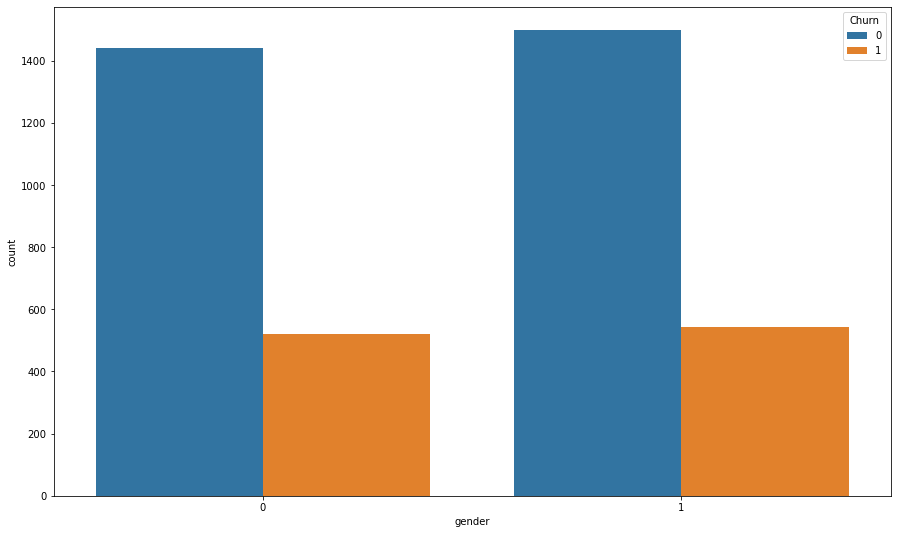

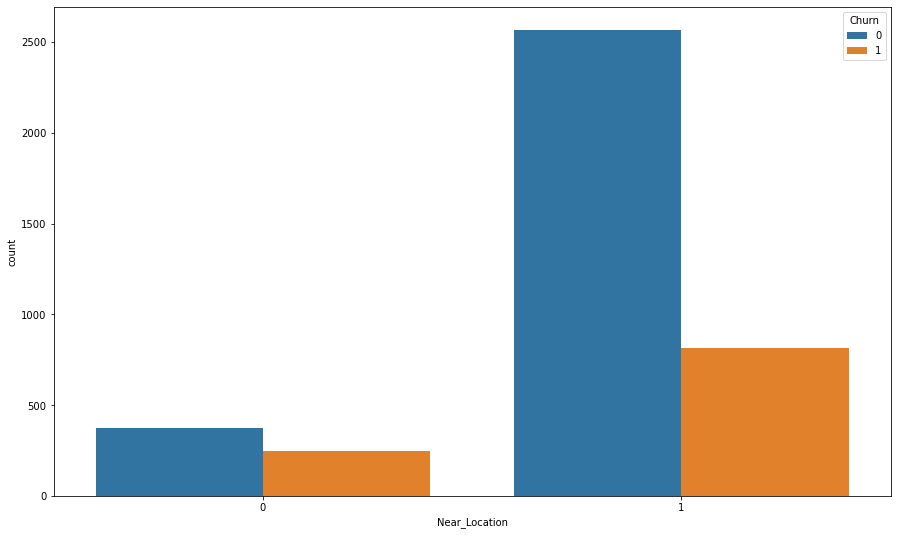

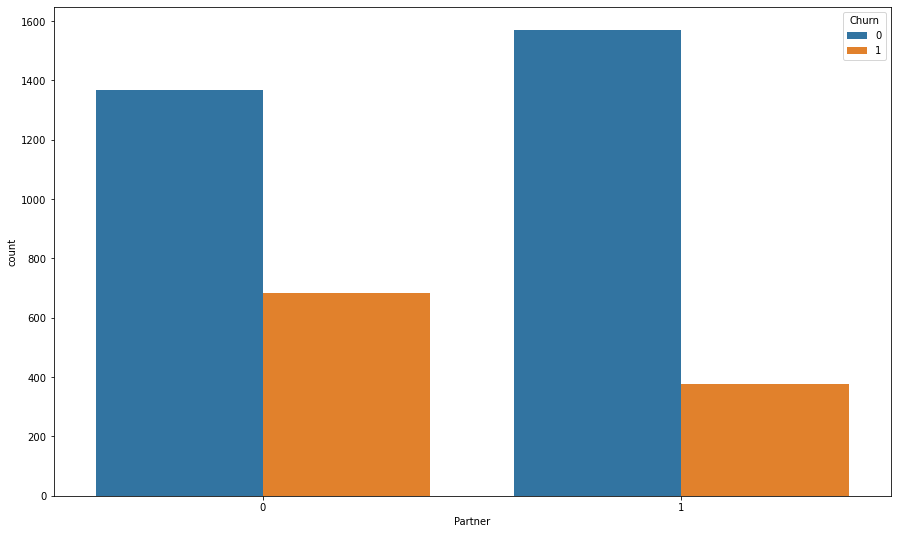

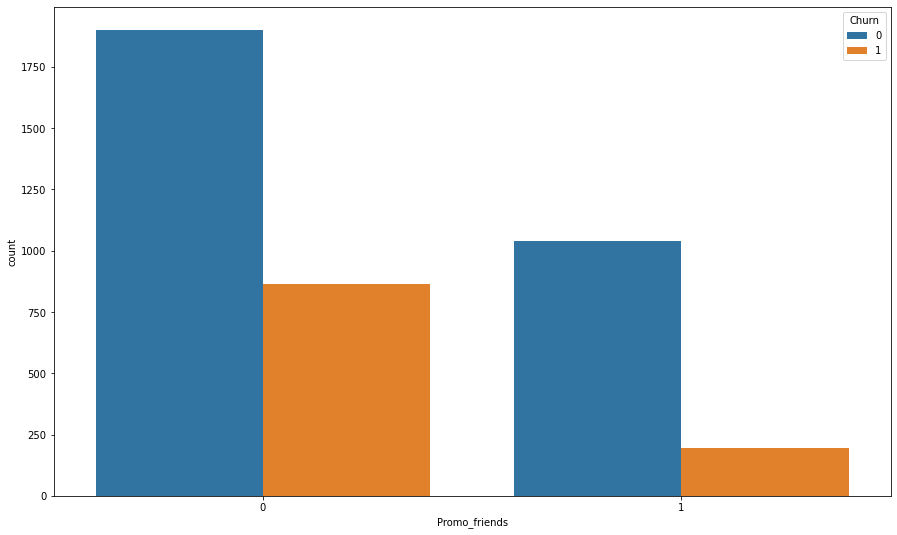

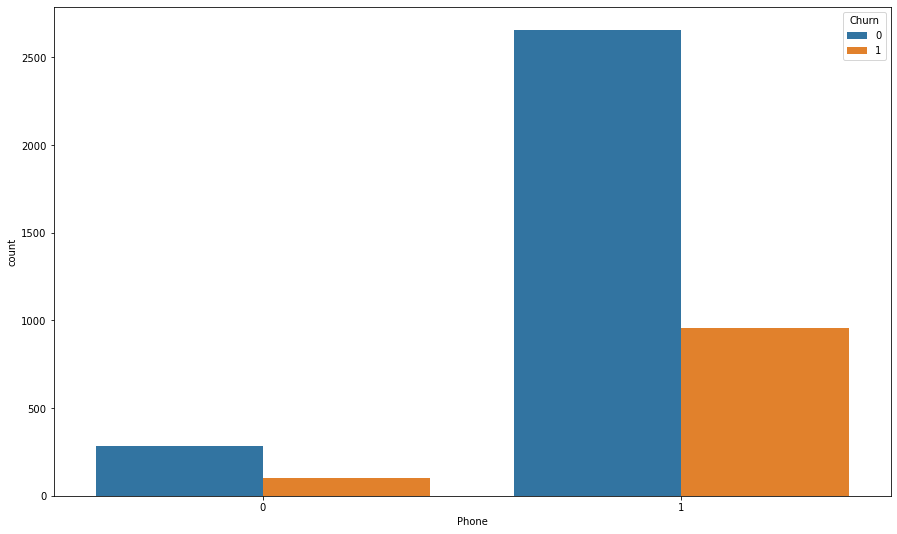

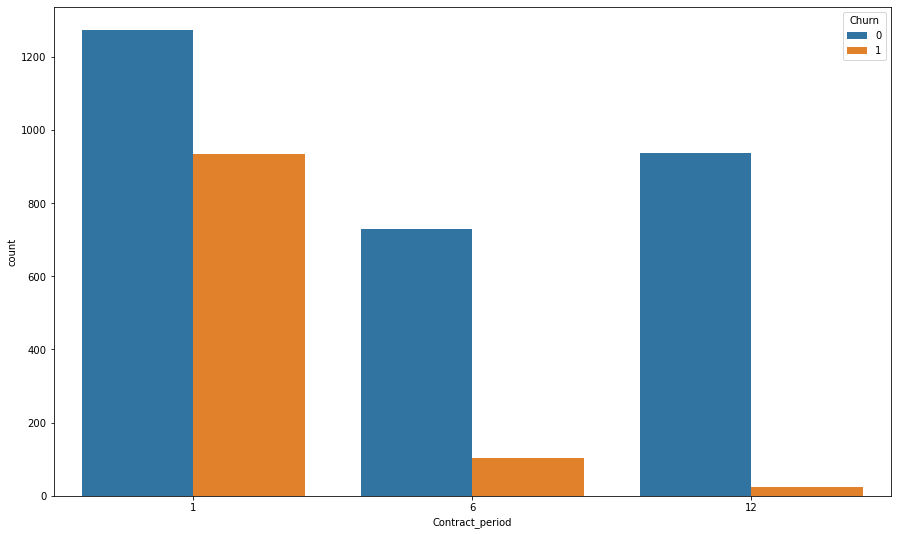

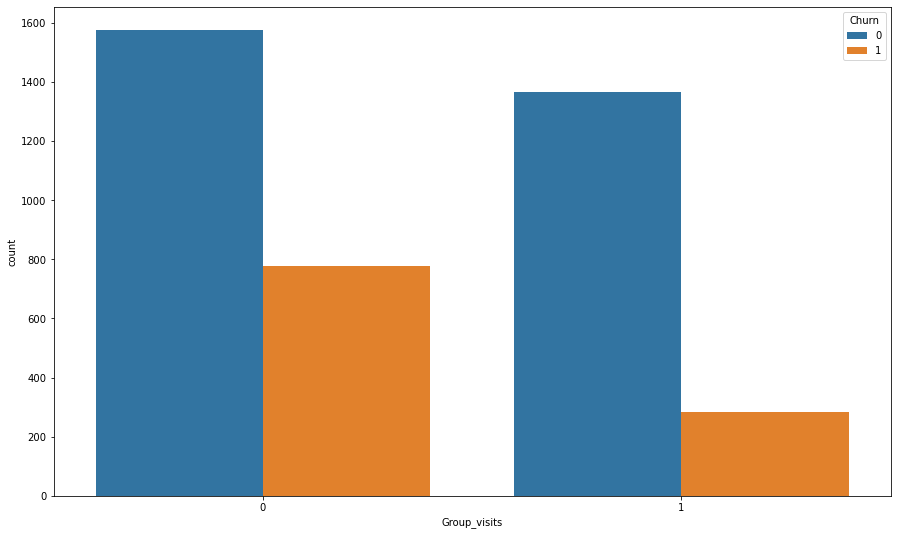

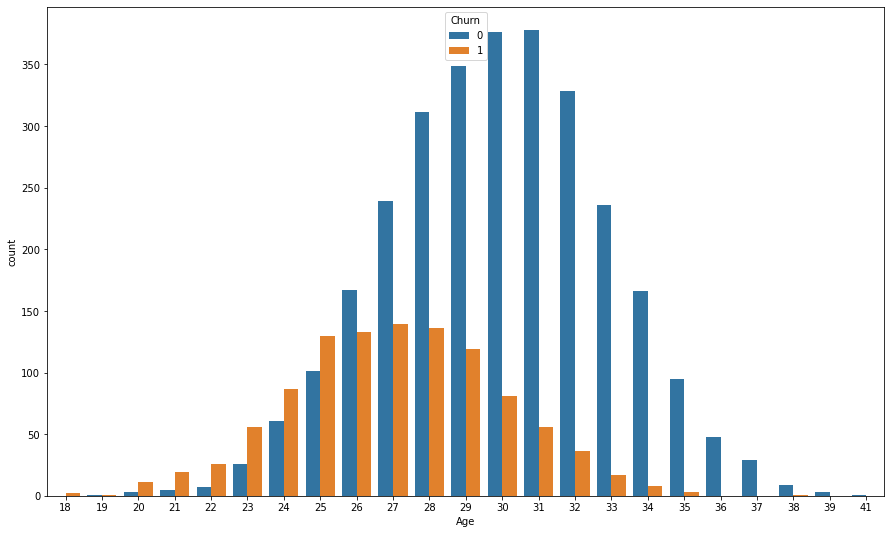

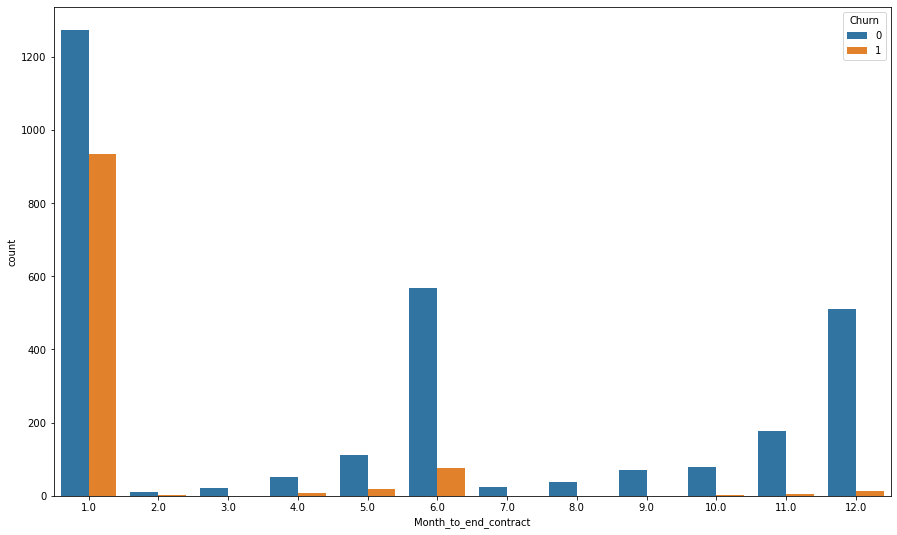

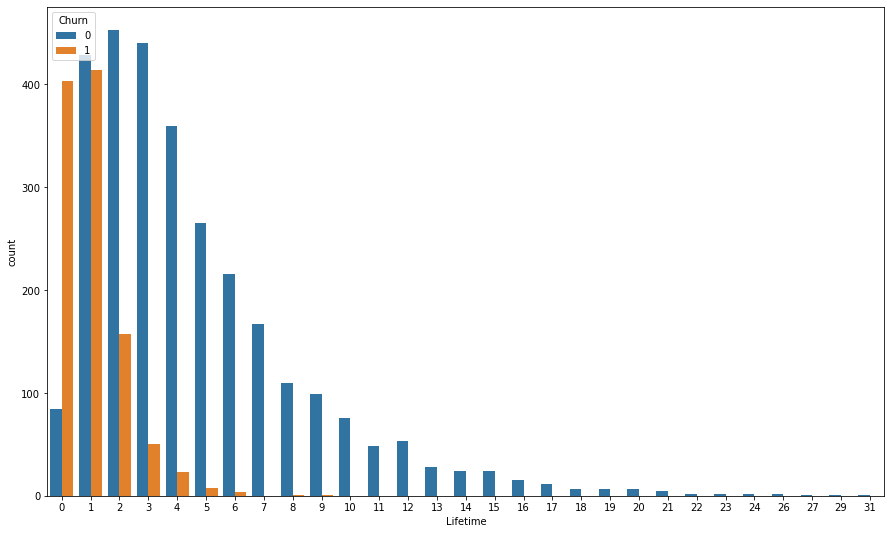

In [7]:
# plot a count distribution of features
for col in data.drop(['Churn','Avg_additional_charges_total','Avg_class_frequency_total','Avg_class_frequency_current_month'], axis = 1).columns:
    plt.figure(figsize=(15,9))
    #sns.barplot(x=data['Churn'],y=data[col])
    sns.countplot(x=col, hue=data['Churn'], data=data)
    #sns.histplot(data=data, x=col, hue=data["Churn"])
    plt.show()


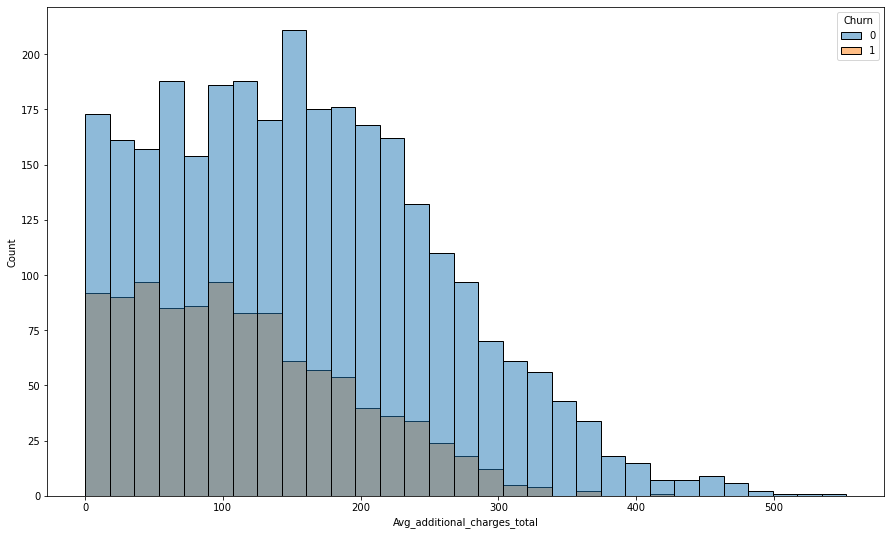

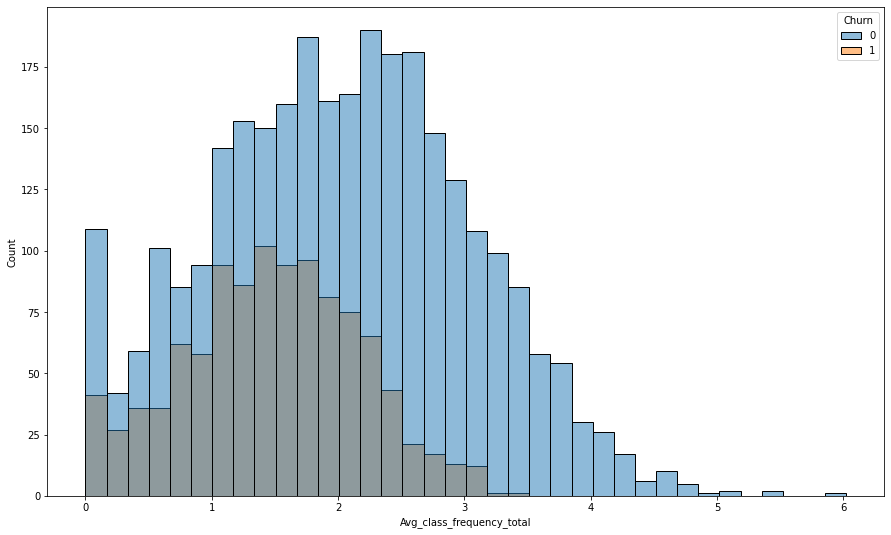

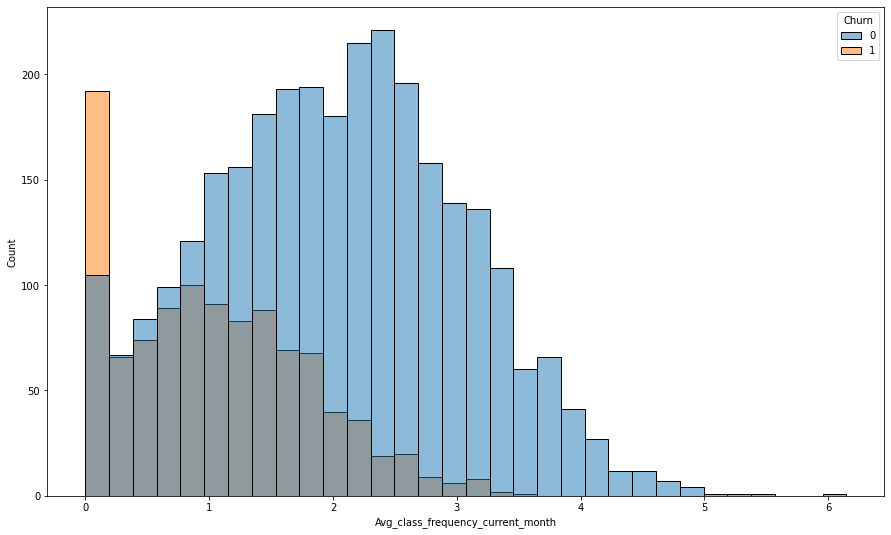

In [8]:
# plot histogram distribution for mean features
for col in data.drop(['Churn','gender','Near_Location','Partner','Promo_friends','Phone','Contract_period','Group_visits','Age','Month_to_end_contract','Lifetime'], axis = 1).columns:
    plt.figure(figsize=(15,9))
    #sns.barplot(x=data['Churn'],y=data[col])
    sns.histplot(data=data, x=col, hue=data["Churn"])
    plt.show()

# Conclusion

    From the histogram we discovered tht gender label 1 has more customers of over 1500 who stayed as compared to 
    customers of gender label 0.
    Also near_location of label 0 have 400 customers who stayed and 300 customers left. near_location of label 1 
    have 2600 customers who stayed and 700 customers of those who left.
    Partner feature of label 0 have over 1300 custoers who stayed and 700 customers who left.Partner feature of 
    label 1 have more customers who stayed at approximately 1600 whiles 300 stayed.
    Age of customers who stayed and those who left are normally distributed.Lifetime feature, the distribution of 
    customers who stayed and those who left are positively skewed with mean to the right with outliers.
    The total amount of money spent on other gym services(Avg_additional_charges_total) feature, distribution of 
    customers are positively skewed with mean located on the right.
    Average frequency of visits per week over the preceding month (Avg_class_frequency_current_month)  feature, 
    distribution of customers are positively skewed with mean located on the right.
    Finally,average frequency of visits per week over the customer's lifetime (Avg_class_frequency_total) feature, 
    distribution of customers are normally distributed.

## Build a correlation matrix and display it.
<a id='step1.4'></a>

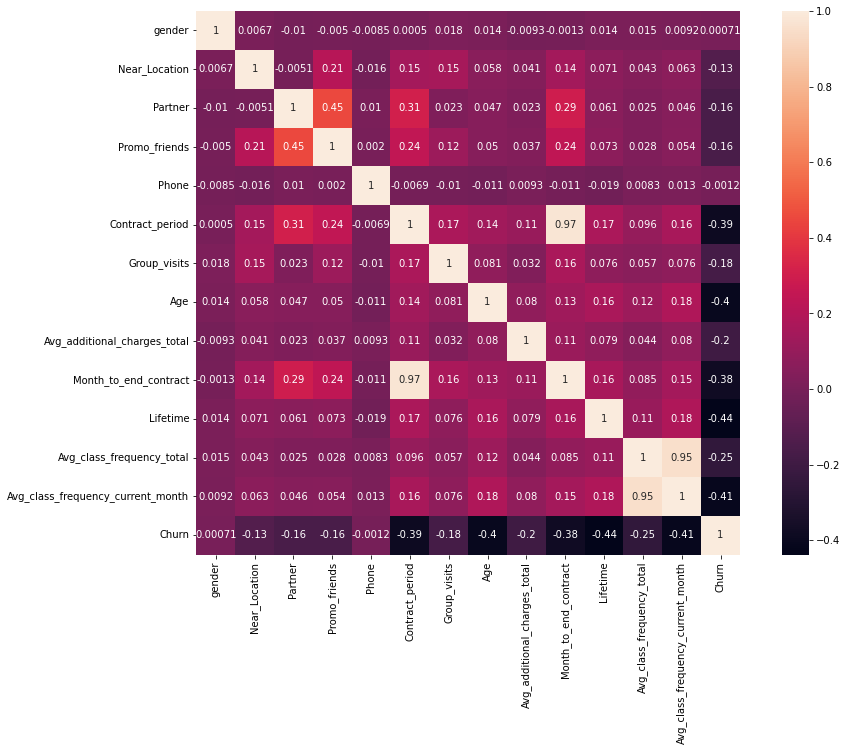

In [9]:
# plot a heatmap for features
plt.figure(figsize=(15,10))
cm = data.corr() # calculate correlation matrix
sns.heatmap(cm,annot=True,square=True)
plt.show()



# Conclusion

    From the heatmap there are positive linear relationships between the following features which means as a feature 
    increases so does the other:
        1) low linear relationship of 0.45 between promo_friends and partner
        2) high linear relationship of 0.97 between contract_period and month_to_end_contract
        3) high linear relationship of  0.95 between Avg_class_frequency_current_month and Avg_class_frequency_total
        
    There are also negative linear relationships between the following features which means as a feature increases 
    the other decreases:
        1) low linear relationship of -0.39 between contract_period and Churn
        2) low linear relationship of -0.4 between age and Churn
        3) low linear relationship of -0.38 between month_to_end_contract and Churn
        4) low linear relationship of -0.44 between lifetime and Churn
        5) low linear relationship of -0.44 between Avg_class_frequency_current_month and Churn
        

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    You explored the data and made some interesting observations! The visualizations are used appropriately
</div>

# Step 3. Build a model to predict user churn
<a id='step2'></a>

In [10]:
# divide dataset into input values and outcome values
X = data.drop('Churn',axis=1)
y = data['Churn']

## Divide the data into train and validation sets using the train_test_split() function.
<a id='step2.1'></a>

In [11]:
# Divide data into train and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Train the model on the train set with two methods:
    logistic regression
    random forest
   <a id='step2.2'></a>

In [12]:
# logistics regression and random forest classifier model
models = [LogisticRegression(),RandomForestClassifier()]

In [13]:
# A function to train,predict and validate model 
def prediction(m, X_train, y_train, X_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:{:.2f} \nPrecision:{:.2f} \nRecall:{:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                      precision_score(y_test, y_pred),
                                                                      recall_score(y_test, y_pred)))

In [14]:
warnings.filterwarnings('ignore')

# Conclusion

    We divided dataset into inputs and outcome values.After build a dataset from the input and outcome values by 
    dividing the input and outcome datasets into train and validation datasets. We then train the datasets on the
    Logistics regression and random forest classifier through a user defined function.
    This function train, predict and calculte the accuracy,precision and recall of both classifiers to determined
    the the best one.

## Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
<a id='step2.3'></a>

In [15]:
# write a loop that outputs metrics for each model
for i in models:
    print(i.__class__.__name__)
    prediction(m=i, X_train=X_train, y_train=y_train, X_test=X_test)
    print('\n')

LogisticRegression
Accuracy:0.90 
Precision:0.81 
Recall:0.79


RandomForestClassifier
Accuracy:0.91 
Precision:0.84 
Recall:0.80




# Conclusion

    Aside accuracy, precision and recall plays a major role in deciding a good model.The question that precision
    metrics answers is all the customers that labelled as stayed or left how many stayed or left?.Hence high precision 
    relates to low false positive rate this means that both classifiers LogisticRegression and RandomForestClassifier 
    with rates of 0.86 ,0.82 respectively are good classifiers but LogisticRegression preforms better in terms of 
    precision.

    Also recall  is the ratio of correctly predicting positive observations to the all observations in actual class. 
    The question recall answers is: Of all the customers that stayed, how many did we label? We have got recall of 0.83 
    and 0.79 for both LogisticRegression and RandomForestClassifier respectively.

    Therefore, we can say that LogisticRegression is a better classifier compared to RandomForestClassifier based on 
    the metrics used.

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    The models were trained and evaluated correctly. Conclusions make sense.
</div>

# Step 4. Create user clusters
<a id='step3'></a>

## Standardize the data.
<a id='step3.1'></a>

In [16]:
# standardize the data
scaler = StandardScaler()
x_train_st=scaler.fit_transform(data)

## Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
<a id='step3.2'></a>

In [17]:
linked = linkage(x_train_st, method='ward')

In [ ]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

# Conclusion

The suggested optimal number of clusters 5 corresponds to the five different colors on the plot.

## Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
<a id='step3.3'></a>

In [ ]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters=5,random_state=0)

In [ ]:
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_train_st)

In [ ]:
# copy dataset
df = data.copy()

In [ ]:
# store cluster labels in the field of our dataset
df['clusters'] = labels

# Conclusion

    We defined kmeans model with 5 clusters and predicted the clusters based on the scaled dataset to obtain the cluster 
    labels for the dataset. We then stored the labels in the field of our dataset which gives each label and it 
    corresponding cluster label.

## Look at the mean feature values for clusters. Does anything catch your eye?
<a id='step3.4'></a>

In [ ]:
df.groupby('clusters').mean().reset_index()

# Conclusion

    Cluster 3 have the highest number of customers who on average frequently  visits per week over the customer's lifetime
    at the gym at the same time the highest average frequency of visits per week over the preceding month.

    Cluster 1 on average generate the highest total amount of money spent on other gym services

## Plot distributions of features for the clusters. Do you notice anything?
<a id='step3.5'></a>

In [ ]:
pip install -U seaborn

In [ ]:
# Plot a graph of clusters against feat
for col in df.drop('clusters',axis=1).columns:
    plt.figure(figsize=(15,10))
    sns.histplot(df, x=col, hue="clusters", multiple="dodge", shrink=.8)
    plt.show()

# Conclusion

    There were few customers in all clusters having Churn 1 as its lable except cluster 2 whiles there was 0 customers 
    in cluster 2 concerning churn label 0.
    Age of customers who stayed and those who left are normally distributed in all clusters.Lifetime feature, the 
    distribution of customers who stayed and those who left are positively skewed in all clusters with mean to the 
    right with outliers.
    The total amount of money spent on other gym services(Avg_additional_charges_total) feature, distribution of 
    customers are positively skewed in all clusters with mean located on the right.
    Average frequency of visits per week over the preceding month (Avg_class_frequency_current_month)  feature, 
    distribution of customers are positively skewed in all clusters with mean located on the right.
    Finally,average frequency of visits per week over the customer's lifetime (Avg_class_frequency_total) feature, 
    distribution of customers are normally distributed in all clusters.

## Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?
<a id='step3.6'></a>

In [ ]:
# the number of entries in the dataset
df.shape[0]

In [ ]:
# group by clusters and churn to calculate the churn rate
diff_churn = df.groupby(['clusters','Churn']).agg(churn_count=('Churn','count')).reset_index()

In [ ]:
# calculate churn rate by dividing by total customers
diff_churn['churn_rate'] = diff_churn['churn_count']/ df.shape[0]

In [ ]:
# view churn rate
diff_churn

In [ ]:
# plot to view loyal and disloyal customers in a cluster
plt.figure(figsize=(15,8))
sns.barplot(x='clusters', y='churn_rate',hue="Churn", data=diff_churn)
plt.show()

# Conclusion

    From the churn rate calculate and the pictorial graph we can see that customers belonging to cluster 1 are the most 
    loyal customers whiles customers of cluster 2 are the most disloyal customers

<div class="alert alert-warning">
    <b>Note</b><br>
    Clusters were successfully identified and studied. I have one suggestion: to ensure reproducibility of your research you can set the random_state parameter of KMeans. Otherwise you will get different clusters every time.
</div>

# Step 5. Come up with conclusions and basic recommendations on working with customers
<a id='step4'></a>

### Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
<a id='step4.1'></a>

    In conclusion customers with gender label 1 tends to stay more than those of label 0 at the same time customers 
    with near_location of label 1 stays more than those of label 0.
    Also customers around the age of 30 and 29 years stays more than others.
    Finally,customers or groupswho have less number of months from the day of registration stays more.